# Initialization

In [ ]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm  
from glob import glob
import os 
import shutil
# thuật y chang như bài toán xóa duplicate của 1 sorted array trong O(n), nhưng so sánh bằng histogram và ssim

In [ ]:
FRAME_FOLDER = r"D:\Python\L22_a\K08\K08_V007"
OUTPUT_FOLDER = r"D:\Python\data\Keyframes\K08\NOT UPDATED\\" + FRAME_FOLDER.split(os.sep)[-1] 


In [5]:
imgs_path = glob(FRAME_FOLDER + "/*.webp")
imgs_path.sort(key=lambda x: int(os.path.basename(x).split('.')[0]))
print(f"[INFO] Found {len(imgs_path)} images.")

[INFO] Found 6722 images.


### Filtering (Histogram & SSIM Comparation)

In [6]:
# Define thresholds
SSIM_THRESHOLD = 0.885
HISTOGRAM_THRESHOLD = 0.8155

In [ ]:
# reference: https://www.geeksforgeeks.org/computer-vision/algorithms-for-image-comparison/#what-is-image-comparison

def Histogram(imageA, imageB, method='correlation'):
    imageA = cv2.cvtColor(imageA, cv2.COLOR_BGR2HSV)
    imageB = cv2.cvtColor(imageB, cv2.COLOR_BGR2HSV)

    # Calculate histograms
    histA = cv2.calcHist([imageA], [0, 1], None, [50, 60], [0, 180, 0, 256])
    histB = cv2.calcHist([imageB], [0, 1], None, [50, 60], [0, 180, 0, 256])

    # Normalize histograms
    cv2.normalize(histA, histA, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(histB, histB, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Use correlation or other methods
    methods = {
        'correlation': cv2.HISTCMP_CORREL,
        'chi-square': cv2.HISTCMP_CHISQR,
        'bhattacharyya': cv2.HISTCMP_BHATTACHARYYA
    }

    comparison = cv2.compareHist(histA, histB, methods[method])
    return comparison

In [ ]:
prev_path = None
result_paths = [imgs_path[0]] 

for path in tqdm(imgs_path, desc="Filtering Frames"):
    if prev_path is None:
        prev_path = path
        continue
    
    gray_i = cv2.cvtColor(cv2.imread(str(prev_path)), cv2.COLOR_BGR2GRAY)
    gray_j = cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2GRAY)
    s = ssim(gray_i, gray_j, data_range=255)

    hist = Histogram(cv2.imread(str(prev_path)), cv2.imread(str(path)), method='correlation')

    # name1 = os.path.basename(prev_path)
    # name2 = os.path.basename(path)
    # print(f"SSIM between {name1} and {name2}: {s:.4f}, Histogram: {hist:.4f}")
    
    if s < SSIM_THRESHOLD and hist < HISTOGRAM_THRESHOLD:
            result_paths.append(path)
            # print("----------------------------> Take: ", name2 )

    prev_path = path

print(f"[INFO] Selected {len(result_paths)} frames out of {len(imgs_path)}.")

Filtering Frames:   0%|          | 0/6722 [00:00<?, ?it/s]

Filtering Frames: 100%|██████████| 6722/6722 [09:49<00:00, 11.40it/s]

[INFO] Selected 283 frames out of 6722.


## Copy file to OUTPUT FOLDER

In [ ]:
if(not os.path.exists(OUTPUT_FOLDER)):
    os.makedirs(OUTPUT_FOLDER)
for path in tqdm(result_paths, desc=f"Copying Selected Frames to {OUTPUT_FOLDER.split(os.sep)[-1]}"):
    shutil.copy(path, OUTPUT_FOLDER)

Moving Selected Frames to K09_V007: 100%|██████████| 283/283 [00:00<00:00, 895.57it/s]


### Display (for testing) 
Show selected imgs for testing so do not run this below block for a large img folder 

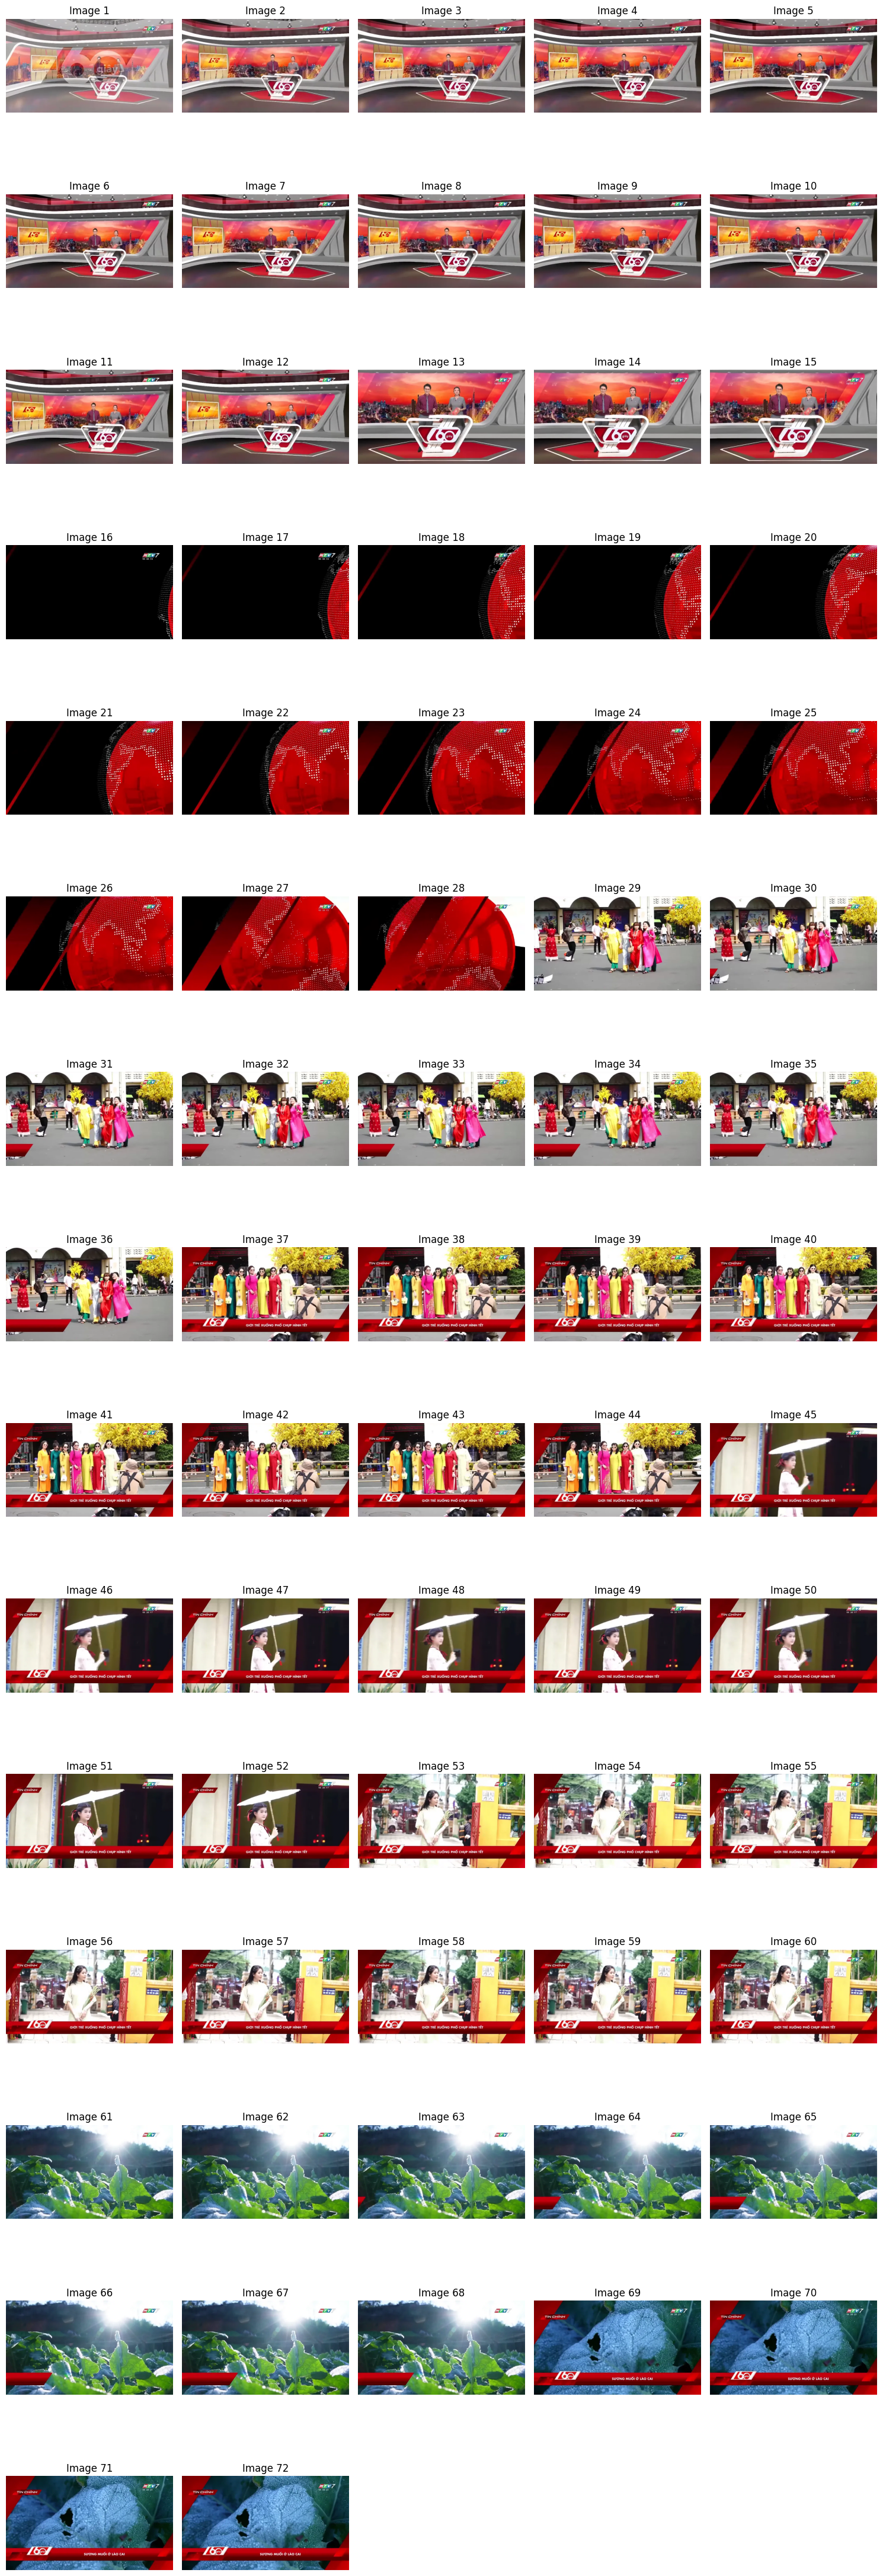

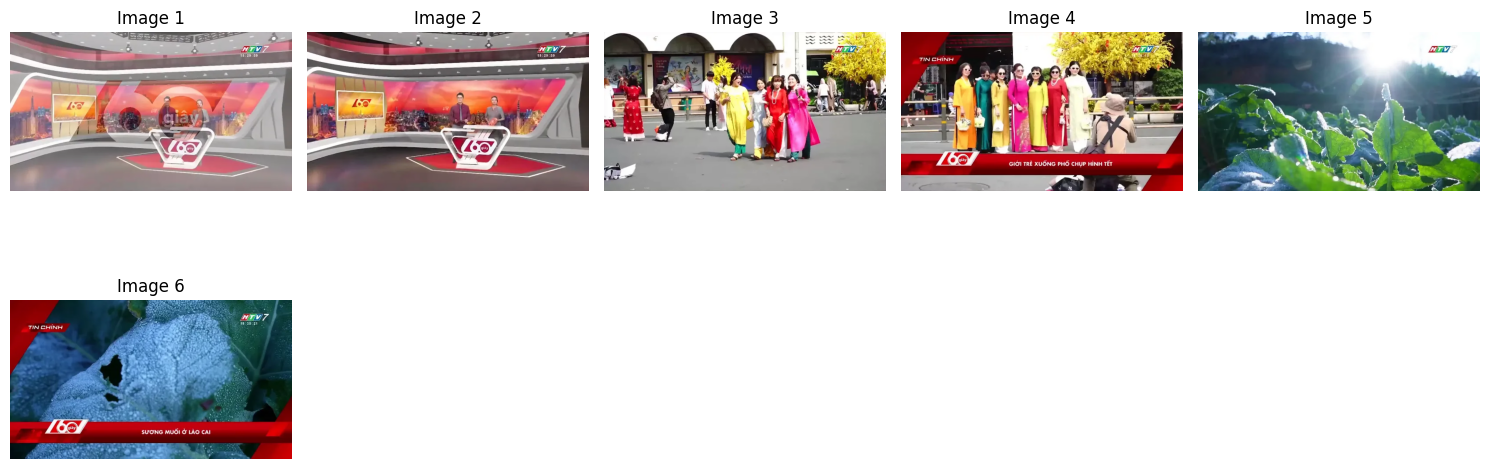

D:\Python\L22_a\K08\example\frames\frame_50.webp
D:\Python\L22_a\K08\example\frames\frame_95.webp
D:\Python\L22_a\K08\example\frames\frame_532.webp
D:\Python\L22_a\K08\example\frames\frame_569.webp
D:\Python\L22_a\K08\example\frames\frame_684.webp
D:\Python\L22_a\K08\example\frames\frame_722.webp


In [ ]:
import matplotlib.pyplot as plt

images = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB) for p in imgs_path]

# ----- Create grid size automatically -----
num_imgs = len(images)
cols = min(5, num_imgs)                 # number of columns
rows = int(np.ceil(num_imgs / cols))    # compute rows automatically

plt.figure(figsize=(15, 3 * rows))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

images = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB) for p in result_paths]

# ----- Create grid size automatically -----
num_imgs = len(images)
cols = min(5, num_imgs)                
rows = int(np.ceil(num_imgs / cols))    

plt.figure(figsize=(15, 3 * rows))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

for i in result_paths:
    print(i)
